In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [27]:
df = pd.read_csv("AviationData1.csv", usecols = ['Event.Id','Investigation.Type','Event.Date', 'Location','Aircraft.damage','Make','Model','Number.of.Engines','Purpose.of.flight','Weather.Condition','Broad.phase.of.flight','Total.Fatal.Injuries'], parse_dates = ['Event.Date'], encoding = "ISO-8859-1")

C:\Users\agnie\AppData\Local\Temp\ipykernel_39628\547396010.py:1: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("AviationData1.csv", usecols = ['Event.Id','Investigation.Type','Event.Date', 'Location','Aircraft.damage','Make','Model','Number.of.Engines','Purpose.of.flight','Weather.Condition','Broad.phase.of.flight','Total.Fatal.Injuries'], parse_dates = ['Event.Date'], encoding = "ISO-8859-1")


In [28]:
df.head()

,Event.Id,Investigation.Type,Event.Date,Location,Aircraft.damage,Make,Model,Number.of.Engines,Purpose.of.flight,Total.Fatal.Injuries,Weather.Condition,Broad.phase.of.flight
0,20001218X45444,Accident,1948-10-24,"MOOSE CREEK, ID",Destroyed,Stinson,108-3,1.0,Personal,2.0,UNK,Cruise
1,20001218X45447,Accident,1962-07-19,"BRIDGEPORT, CA",Destroyed,Piper,PA24-180,1.0,Personal,4.0,UNK,Unknown
2,20061025X01555,Accident,1974-08-30,"Saltville, VA",Destroyed,Cessna,172M,1.0,Personal,3.0,IMC,Cruise
3,20001218X45448,Accident,1977-06-19,"EUREKA, CA",Destroyed,Rockwell,112,1.0,Personal,2.0,IMC,Cruise
4,20041105X01764,Accident,1979-08-02,"Canton, OH",Destroyed,Cessna,501,NaN,Personal,1.0,VMC,Approach


In [29]:
df.dtypes

Event.Id                         object
Investigation.Type               object
Event.Date               datetime64[ns]
Location                         object
Aircraft.damage                  object
Make                             object
Model                            object
Number.of.Engines               float64
Purpose.of.flight                object
Total.Fatal.Injuries            float64
Weather.Condition                object
Broad.phase.of.flight            object
dtype: object

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Investigation.Type     88889 non-null  object        
 1   Event.Date             88889 non-null  datetime64[ns]
 2   Location               88837 non-null  object        
 3   Aircraft.damage        85695 non-null  object        
 4   Make                   88826 non-null  object        
 5   Model                  88797 non-null  object        
 6   Number.of.Engines      82805 non-null  float64       
 7   Purpose.of.flight      82697 non-null  object        
 8   Total.Fatal.Injuries   77488 non-null  float64       
 9   Weather.Condition      84397 non-null  object        
 10  Broad.phase.of.flight  61724 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(8)
memory usage: 7.5+ MB


In [12]:
df['Year'] = df['Event.Date'].dt.year
df['Month'] = df['Event.Date'].dt.month_name()
df['Day'] = df['Event.Date'].dt.day_name()

In [13]:
df.head()

,Investigation.Type,Event.Date,Location,Aircraft.damage,Make,Model,Number.of.Engines,Purpose.of.flight,Total.Fatal.Injuries,Weather.Condition,Broad.phase.of.flight,Year,Month,Day
0,Accident,1948-10-24,"MOOSE CREEK, ID",Destroyed,Stinson,108-3,1.0,Personal,2.0,UNK,Cruise,1948,October,Sunday
1,Accident,1962-07-19,"BRIDGEPORT, CA",Destroyed,Piper,PA24-180,1.0,Personal,4.0,UNK,Unknown,1962,July,Thursday
2,Accident,1974-08-30,"Saltville, VA",Destroyed,Cessna,172M,1.0,Personal,3.0,IMC,Cruise,1974,August,Friday
3,Accident,1977-06-19,"EUREKA, CA",Destroyed,Rockwell,112,1.0,Personal,2.0,IMC,Cruise,1977,June,Sunday
4,Accident,1979-08-02,"Canton, OH",Destroyed,Cessna,501,NaN,Personal,1.0,VMC,Approach,1979,August,Thursday


In [14]:
df.isnull().sum()

Investigation.Type           0
Event.Date                   0
Location                    52
Aircraft.damage           3194
Make                        63
Model                       92
Number.of.Engines         6084
Purpose.of.flight         6192
Total.Fatal.Injuries     11401
Weather.Condition         4492
Broad.phase.of.flight    27165
Year                         0
Month                        0
Day                          0
dtype: int64

In [68]:
df['City'] = df['Location'].str.split(',').str[0]
df['State'] = df['Location'].str.split(',').str[1]

In [69]:
df.head()

,Event.Id,Investigation.Type,Event.Date,Location,Aircraft.damage,Make,Model,Number.of.Engines,Purpose.of.flight,Total.Fatal.Injuries,Weather.Condition,Broad.phase.of.flight,City,State
0,20001218X45444,Accident,1948-10-24,"MOOSE CREEK, ID",Destroyed,Stinson,108-3,1.0,Personal,2.0,UNK,Cruise,MOOSE CREEK,ID
1,20001218X45447,Accident,1962-07-19,"BRIDGEPORT, CA",Destroyed,Piper,PA24-180,1.0,Personal,4.0,UNK,Unknown,BRIDGEPORT,CA
2,20061025X01555,Accident,1974-08-30,"Saltville, VA",Destroyed,Cessna,172M,1.0,Personal,3.0,IMC,Cruise,Saltville,VA
3,20001218X45448,Accident,1977-06-19,"EUREKA, CA",Destroyed,Rockwell,112,1.0,Personal,2.0,IMC,Cruise,EUREKA,CA
4,20041105X01764,Accident,1979-08-02,"Canton, OH",Destroyed,Cessna,501,NaN,Personal,1.0,VMC,Approach,Canton,OH


In [70]:
df['Weather.Condition'].replace(to_replace = ['Unk', 'UNK'], value = 'Unknown', inplace = True)

In [71]:
df.head()

,Event.Id,Investigation.Type,Event.Date,Location,Aircraft.damage,Make,Model,Number.of.Engines,Purpose.of.flight,Total.Fatal.Injuries,Weather.Condition,Broad.phase.of.flight,City,State
0,20001218X45444,Accident,1948-10-24,"MOOSE CREEK, ID",Destroyed,Stinson,108-3,1.0,Personal,2.0,Unknown,Cruise,MOOSE CREEK,ID
1,20001218X45447,Accident,1962-07-19,"BRIDGEPORT, CA",Destroyed,Piper,PA24-180,1.0,Personal,4.0,Unknown,Unknown,BRIDGEPORT,CA
2,20061025X01555,Accident,1974-08-30,"Saltville, VA",Destroyed,Cessna,172M,1.0,Personal,3.0,IMC,Cruise,Saltville,VA
3,20001218X45448,Accident,1977-06-19,"EUREKA, CA",Destroyed,Rockwell,112,1.0,Personal,2.0,IMC,Cruise,EUREKA,CA
4,20041105X01764,Accident,1979-08-02,"Canton, OH",Destroyed,Cessna,501,NaN,Personal,1.0,VMC,Approach,Canton,OH


In [72]:
new_df = df.dropna()

In [73]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48601 entries, 0 to 63909
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Event.Id               48601 non-null  object        
 1   Investigation.Type     48601 non-null  object        
 2   Event.Date             48601 non-null  datetime64[ns]
 3   Location               48601 non-null  object        
 4   Aircraft.damage        48601 non-null  object        
 5   Make                   48601 non-null  object        
 6   Model                  48601 non-null  object        
 7   Number.of.Engines      48601 non-null  float64       
 8   Purpose.of.flight      48601 non-null  object        
 9   Total.Fatal.Injuries   48601 non-null  float64       
 10  Weather.Condition      48601 non-null  object        
 11  Broad.phase.of.flight  48601 non-null  object        
 12  City                   48601 non-null  object        
 13  S

<AxesSubplot:>

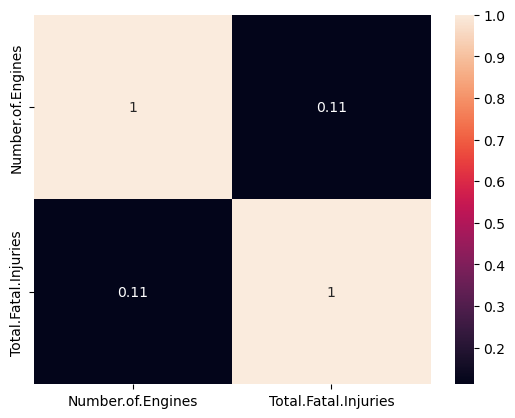

In [74]:

sns.heatmap(new_df.corr(), annot=True)

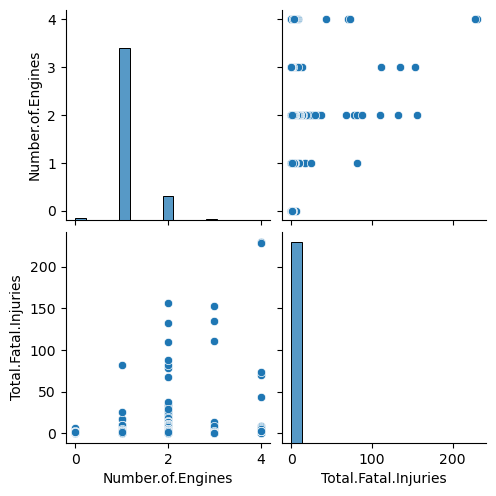

In [75]:
sns.pairplot(new_df)
plt.show()

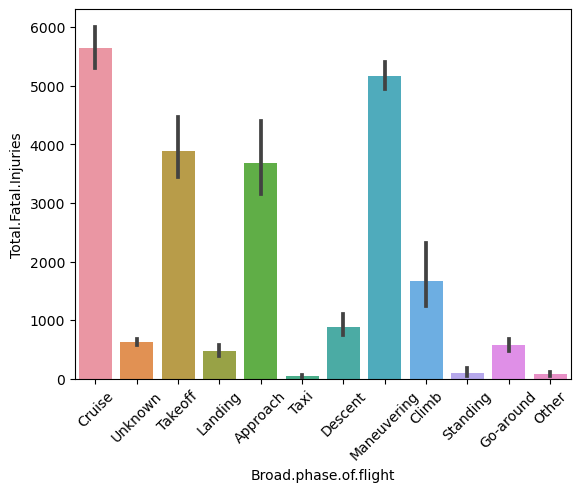

In [76]:

flight_phase_plot = sns.barplot(data = new_df, x = new_df['Broad.phase.of.flight'],y= new_df['Total.Fatal.Injuries'], estimator = sum)
flight_phase_plot.set_xticklabels(flight_phase_plot.get_xticklabels(), rotation=45)
plt.show()

<AxesSubplot:xlabel='Aircraft.damage', ylabel='Total.Fatal.Injuries'>

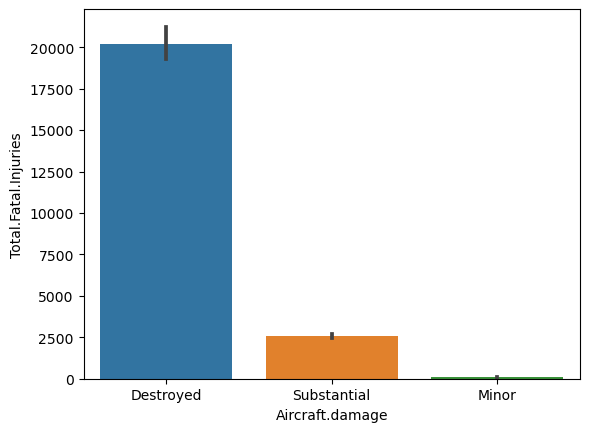

In [77]:
sns.barplot(x = new_df['Aircraft.damage'],y= new_df['Total.Fatal.Injuries'], estimator = sum)

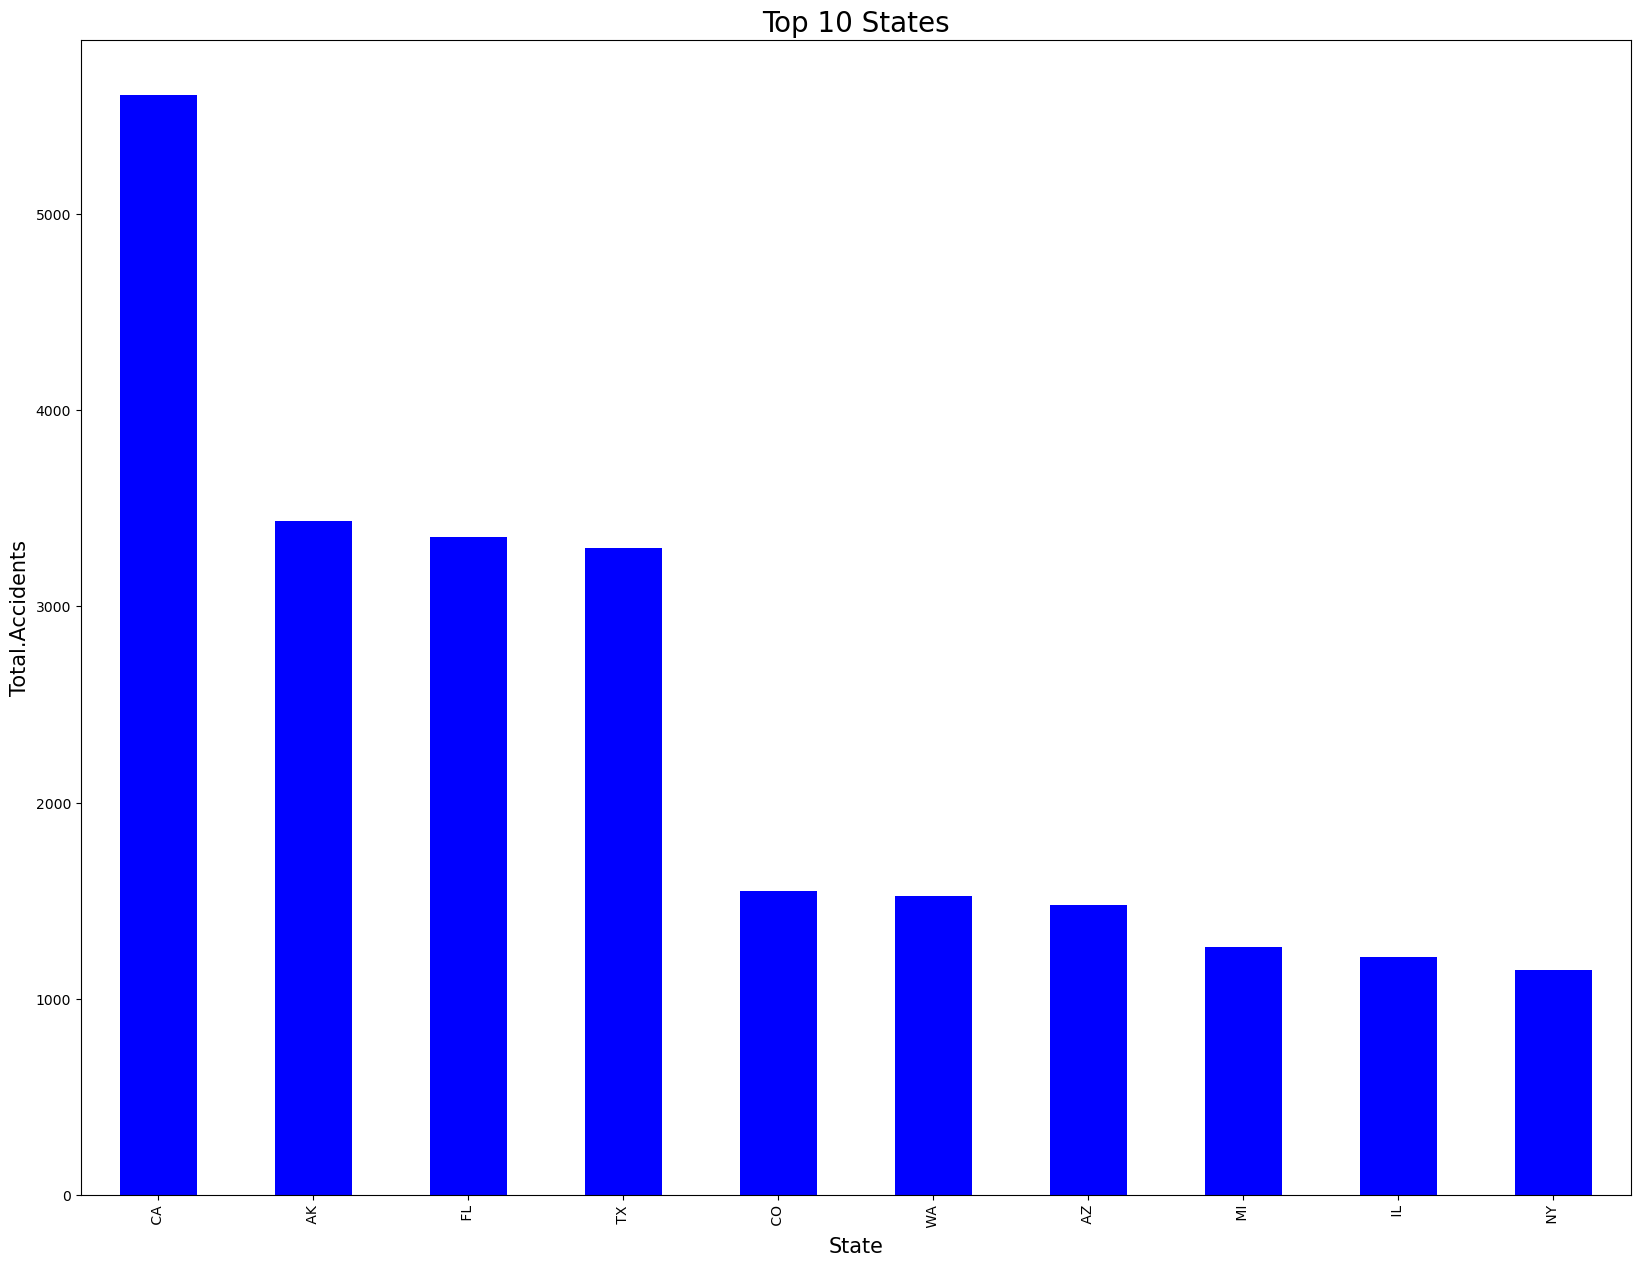

In [117]:
plt.figure(figsize=(20,15))
new_df['State'].str.upper().value_counts().sort_values(ascending=False)[:10].plot(kind='bar', color='Blue')
plt.xticks(rotation=90)
plt.xlabel("State", size=15)
plt.ylabel("Total.Accidents", size=15)
plt.title("Top 10 States", size=20)
plt.show()

In [90]:
state_df = new_df.groupby('State')

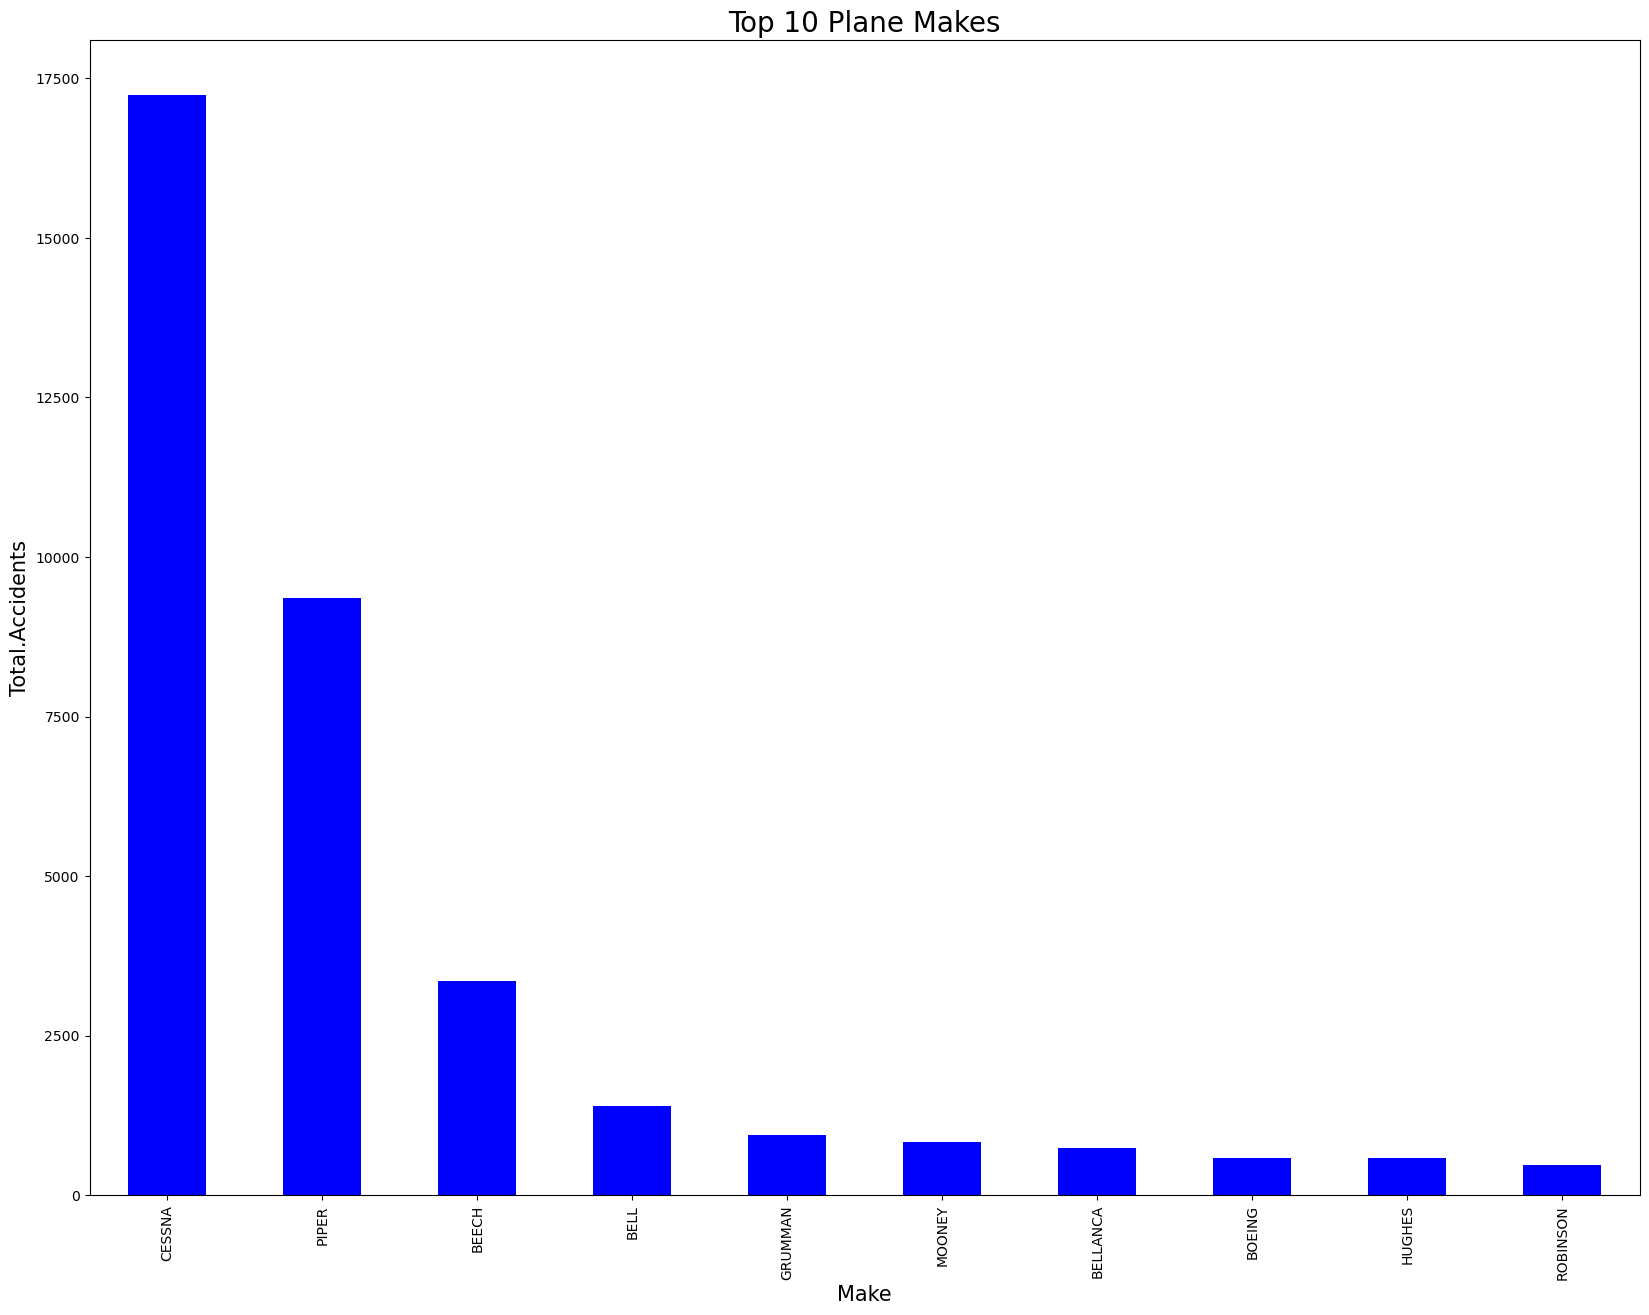

In [116]:
plt.figure(figsize=(20,15))
new_df['Make'].str.upper().value_counts().sort_values(ascending=False)[:10].plot(kind='bar', color='Blue')
plt.xticks(rotation=90)
plt.xlabel("Make", size=15)
plt.ylabel("Total.Accidents", size=15)
plt.title("Top 10 Plane Makes", size=20)
plt.show()

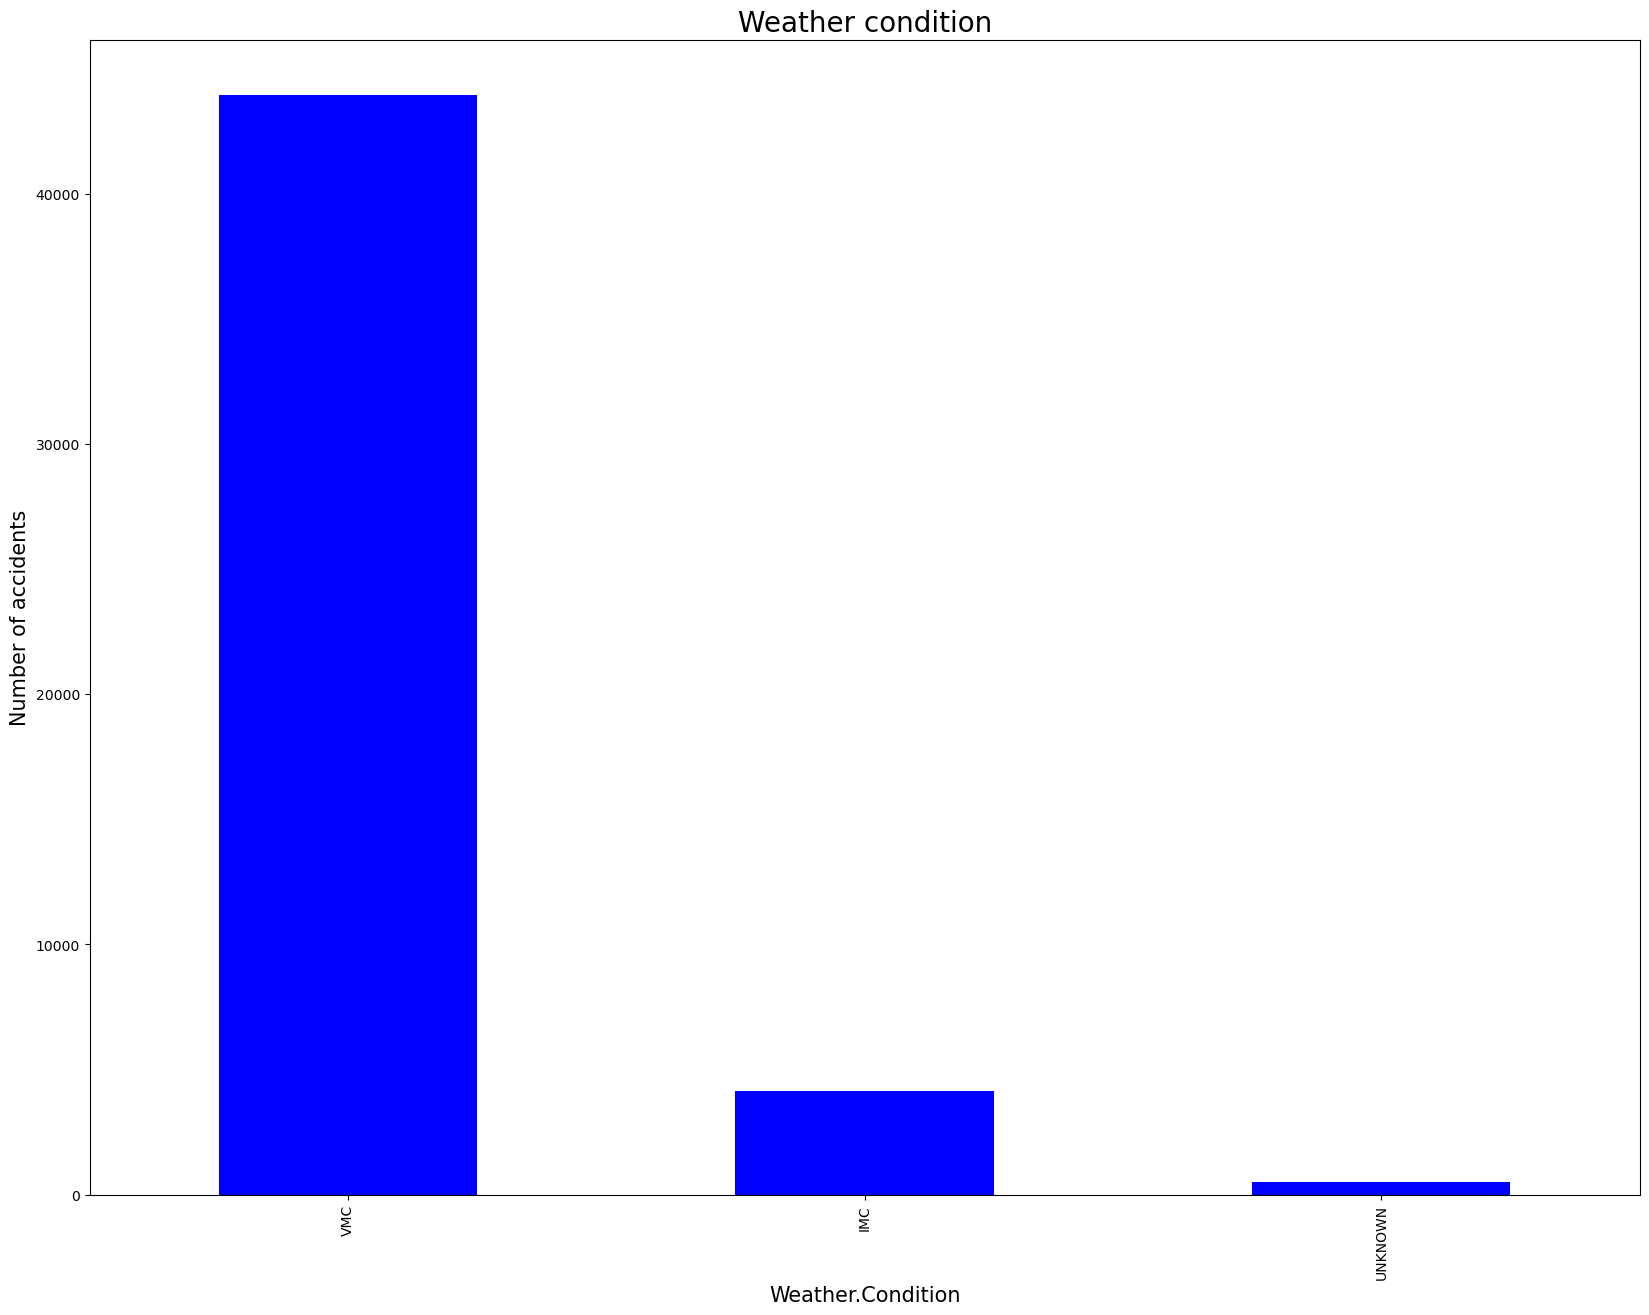

In [105]:
plt.figure(figsize=(20,15))
new_df['Weather.Condition'].str.upper().value_counts().sort_values(ascending=False)[:10].plot(kind='bar', color='Blue')
plt.xlabel("Weather.Condition", size=15)
plt.ylabel("Number of accidents", size=15)
plt.title("Weather condition", size=20)
plt.show()

In [102]:
new_df['Total.Fatal.Injuries'].sum()

22837.0

In [143]:
new_df

,Event.Id,Investigation.Type,Event.Date,Location,Aircraft.damage,Make,Model,Number.of.Engines,Purpose.of.flight,Total.Fatal.Injuries,Weather.Condition,Broad.phase.of.flight,City,State
0,20001218X45444,Accident,1948-10-24,"MOOSE CREEK, ID",Destroyed,Stinson,108-3,1.0,Personal,2.0,Unknown,Cruise,MOOSE CREEK,ID
1,20001218X45447,Accident,1962-07-19,"BRIDGEPORT, CA",Destroyed,Piper,PA24-180,1.0,Personal,4.0,Unknown,Unknown,BRIDGEPORT,CA
2,20061025X01555,Accident,1974-08-30,"Saltville, VA",Destroyed,Cessna,172M,1.0,Personal,3.0,IMC,Cruise,Saltville,VA
3,20001218X45448,Accident,1977-06-19,"EUREKA, CA",Destroyed,Rockwell,112,1.0,Personal,2.0,IMC,Cruise,EUREKA,CA
6,20001218X45446,Accident,1981-08-01,"COTTON, MN",Destroyed,Cessna,180,1.0,Personal,4.0,IMC,Unknown,COTTON,MN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63899,20080108X00030,Accident,2007-12-27,"Traverse City, MI",Destroyed,Cessna,310R,2.0,Personal,1.0,IMC,Approach,Traverse City,MI
63900,20080102X00006,Accident,2007-12-28,"MURRIETA, CA",Substantial,Hein,Sonex,1.0,Personal,0.0,VMC,Cruise,MURRIETA,CA
63906,20080103X00010,Accident,2007-12-29,"Crowley, TX",Destroyed,Althouse,RAF 2000 GTX,1.0,Personal,2.0,VMC,Maneuvering,Crowley,TX
63908,20080109X00032,Accident,2007-12-30,"CHEROKEE, AL",Substantial,Bell,206L-3,1.0,Other Work Use,3.0,VMC,Maneuvering,CHEROKEE,AL


In [183]:
new_df['Year'] = new_df['Event.Date'].dt.year
new_df['Month'] = new_df['Event.Date'].dt.month_name()
new_df['Day'] = new_df['Event.Date'].dt.day_name()

C:\Users\agnie\AppData\Local\Temp\ipykernel_39628\1793734975.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Year'] = new_df['Event.Date'].dt.year
C:\Users\agnie\AppData\Local\Temp\ipykernel_39628\1793734975.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Month'] = new_df['Event.Date'].dt.month_name()
C:\Users\agnie\AppData\Local\Temp\ipykernel_39628\1793734975.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

In [184]:
new_df


,Event.Id,Investigation.Type,Event.Date,Location,Aircraft.damage,Make,Model,Number.of.Engines,Purpose.of.flight,Total.Fatal.Injuries,Weather.Condition,Broad.phase.of.flight,City,State,Year,Month,Day
0,20001218X45444,Accident,1948-10-24,"MOOSE CREEK, ID",Destroyed,Stinson,108-3,1.0,Personal,2.0,Unknown,Cruise,MOOSE CREEK,ID,1948,October,Sunday
1,20001218X45447,Accident,1962-07-19,"BRIDGEPORT, CA",Destroyed,Piper,PA24-180,1.0,Personal,4.0,Unknown,Unknown,BRIDGEPORT,CA,1962,July,Thursday
2,20061025X01555,Accident,1974-08-30,"Saltville, VA",Destroyed,Cessna,172M,1.0,Personal,3.0,IMC,Cruise,Saltville,VA,1974,August,Friday
3,20001218X45448,Accident,1977-06-19,"EUREKA, CA",Destroyed,Rockwell,112,1.0,Personal,2.0,IMC,Cruise,EUREKA,CA,1977,June,Sunday
6,20001218X45446,Accident,1981-08-01,"COTTON, MN",Destroyed,Cessna,180,1.0,Personal,4.0,IMC,Unknown,COTTON,MN,1981,August,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63899,20080108X00030,Accident,2007-12-27,"Traverse City, MI",Destroyed,Cessna,310R,2.0,Personal,1.0,IMC,Approach,Traverse City,MI,2007,December,Thursday
63900,20080102X00006,Accident,2007-12-28,"MURRIETA, CA",Substantial,Hein,Sonex,1.0,Personal,0.0,VMC,Cruise,MURRIETA,CA,2007,December,Friday
63906,20080103X00010,Accident,2007-12-29,"Crowley, TX",Destroyed,Althouse,RAF 2000 GTX,1.0,Personal,2.0,VMC,Maneuvering,Crowley,TX,2007,December,Saturday
63908,20080109X00032,Accident,2007-12-30,"CHEROKEE, AL",Substantial,Bell,206L-3,1.0,Other Work Use,3.0,VMC,Maneuvering,CHEROKEE,AL,2007,December,Sunday


In [112]:
weather_grouped= new_df.groupby("Weather.Condition").sum().reset_index()
weather_grouped

,Weather.Condition,Number.of.Engines,Total.Fatal.Injuries
0,IMC,5557.0,6246.0
1,Unknown,608.0,631.0
2,VMC,48938.0,15960.0


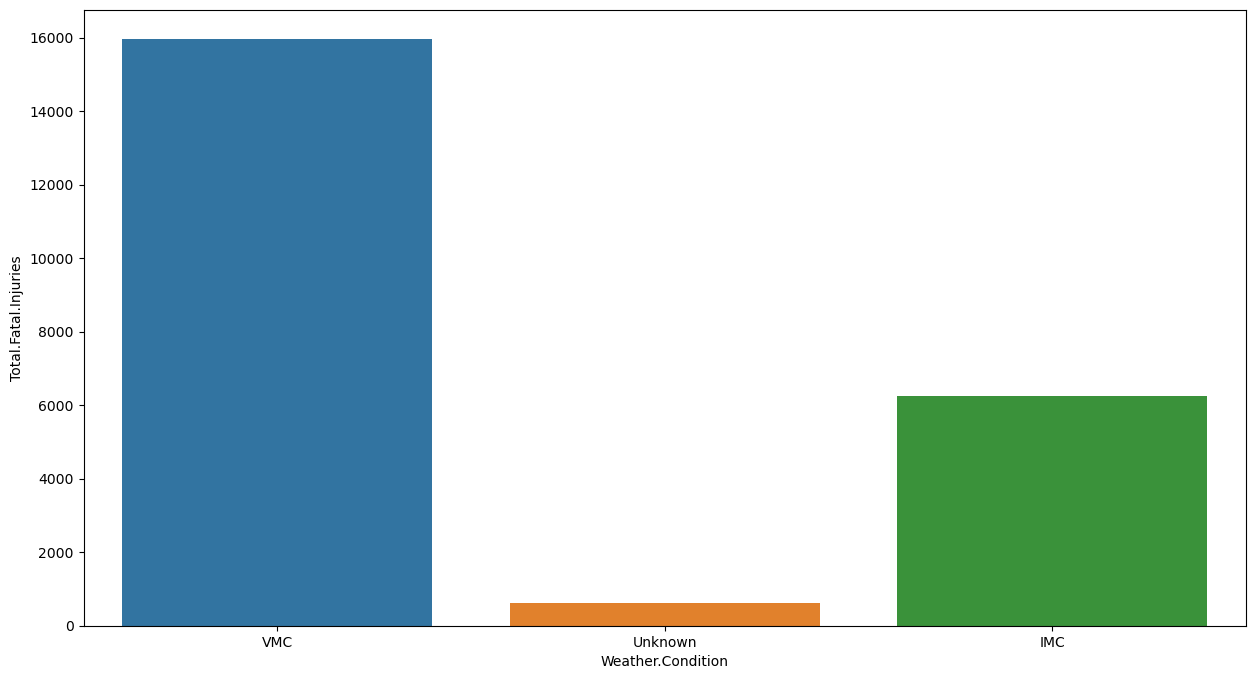

In [115]:
plt.figure(figsize = (15,8))
Weather_grouped_plot = sns.barplot(data = weather_grouped, x = weather_grouped['Weather.Condition'].sort_values(ascending=False)[:3], y= weather_grouped['Total.Fatal.Injuries'])
plt.show()

In [121]:
phase_flight_grouped= new_df.groupby("Broad.phase.of.flight").sum('Total.Fatal.Injuries').reset_index()
phase_flight_grouped

,Broad.phase.of.flight,Number.of.Engines,Total.Fatal.Injuries
0,Approach,6214.0,3689.0
1,Climb,1973.0,1675.0
2,Cruise,9264.0,5645.0
3,Descent,1636.0,889.0
4,Go-around,1266.0,575.0
5,Landing,12952.0,477.0
6,Maneuvering,7293.0,5157.0
7,Other,104.0,83.0
8,Standing,707.0,98.0
9,Takeoff,11294.0,3885.0


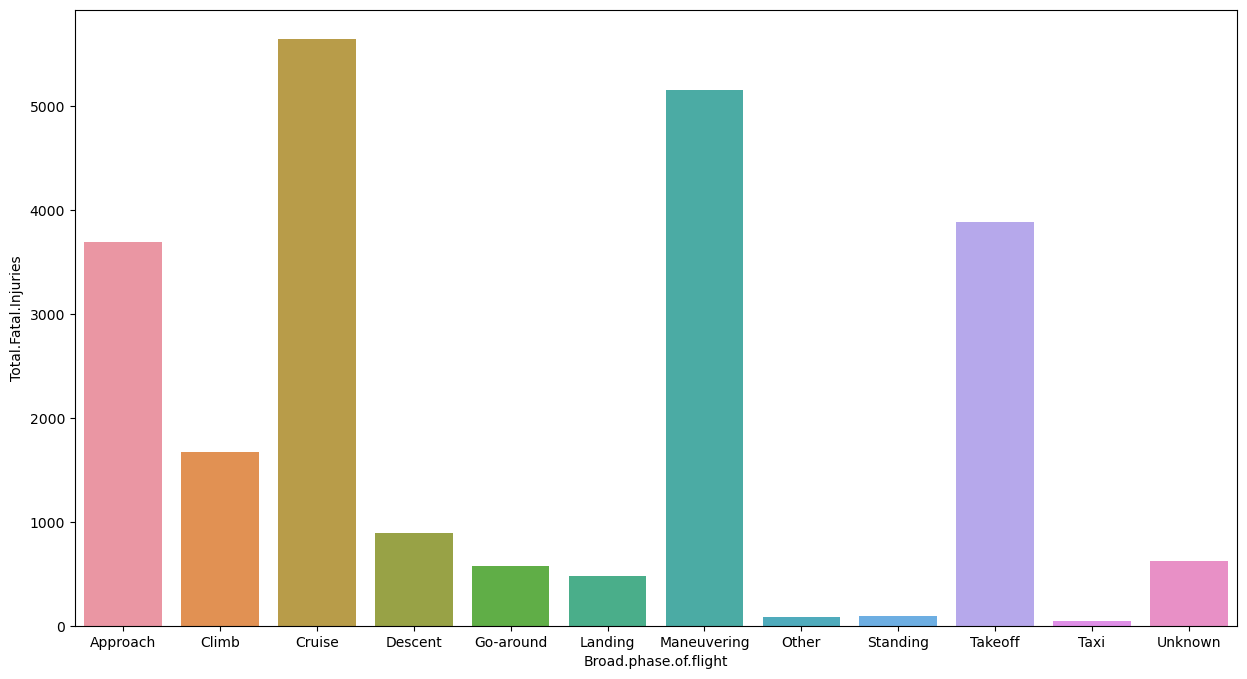

In [133]:
plt.figure(figsize = (15,8))
phase_flight_grouped_plot = sns.barplot(data = phase_flight_grouped, x = phase_flight_grouped['Broad.phase.of.flight'], y= phase_flight_grouped['Total.Fatal.Injuries'])
plt.show()

In [134]:
make_grouped= new_df.groupby("Make").sum('Total.Fatal.Injuries').reset_index()
make_grouped

,Make,Number.of.Engines,Total.Fatal.Injuries
0,1st Ftr Gp,1.0,1.0
1,2000 Mccoy,1.0,1.0
2,67 Flying Dutchman,1.0,0.0
3,85 Manista,1.0,1.0
4,A. H. Gettings,1.0,0.0
...,...,...,...
3493,Zivko Aeronautics Inc.,1.0,1.0
3494,Zlin Aviation S.r.o.,1.0,2.0
3495,Zorn,1.0,1.0
3496,Zukowski,1.0,0.0


In [140]:
Aircraft_damage_grouped= new_df.groupby("Aircraft.damage").sum('Total.Fatal.Injuries').reset_index()
Aircraft_damage_grouped

,Aircraft.damage,Number.of.Engines,Total.Fatal.Injuries
0,Destroyed,16050.0,20186.0
1,Minor,2456.0,86.0
2,Substantial,36597.0,2565.0


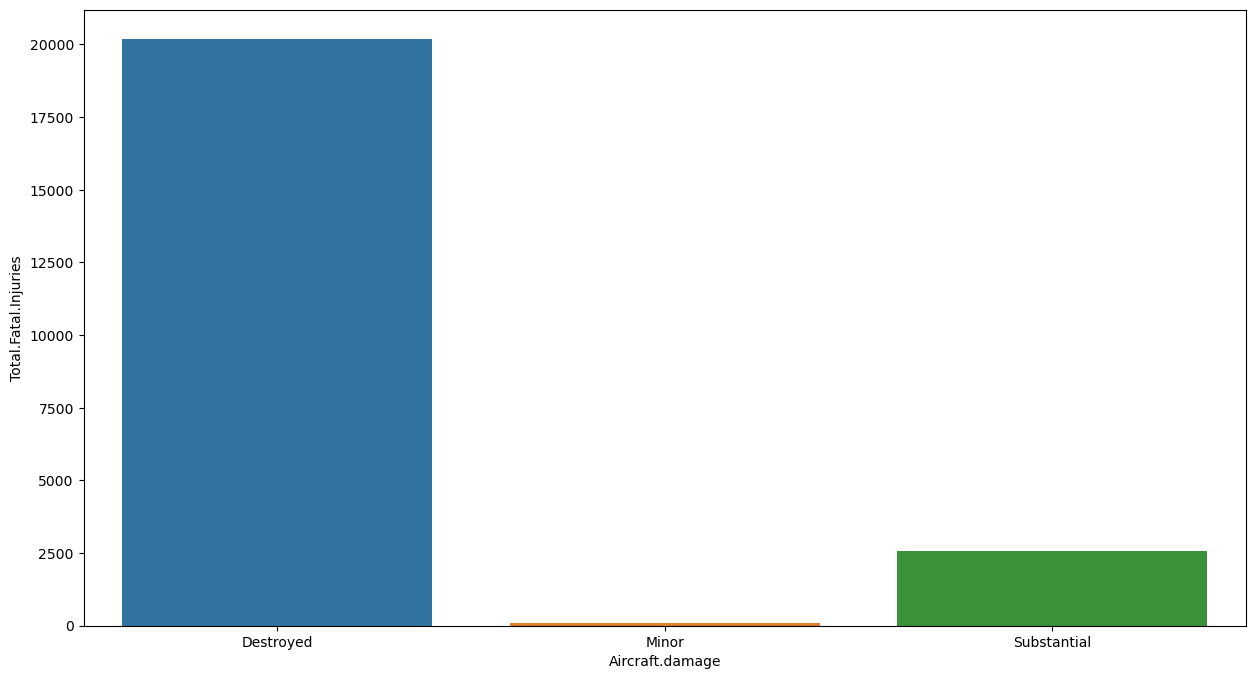

In [141]:
plt.figure(figsize = (15,8))
Aircraft_damage_grouped_plot = sns.barplot(data = Aircraft_damage_grouped, x = Aircraft_damage_grouped['Aircraft.damage'], y= Aircraft_damage_grouped['Total.Fatal.Injuries'])
plt.show()

In [146]:
day_grouped= new_df.groupby("Day").sum('Total.Fatal.Injuries').reset_index()
day_grouped

,Day,Number.of.Engines,Total.Fatal.Injuries,Year
0,Friday,8099.0,3514.0,13964614
1,Monday,6692.0,2626.0,11490978
2,Saturday,10116.0,4012.0,18528211
3,Sunday,9473.0,4262.0,17397864
4,Thursday,7188.0,2848.0,12264812
5,Tuesday,6526.0,2336.0,11214079
6,Wednesday,7009.0,3239.0,11883813


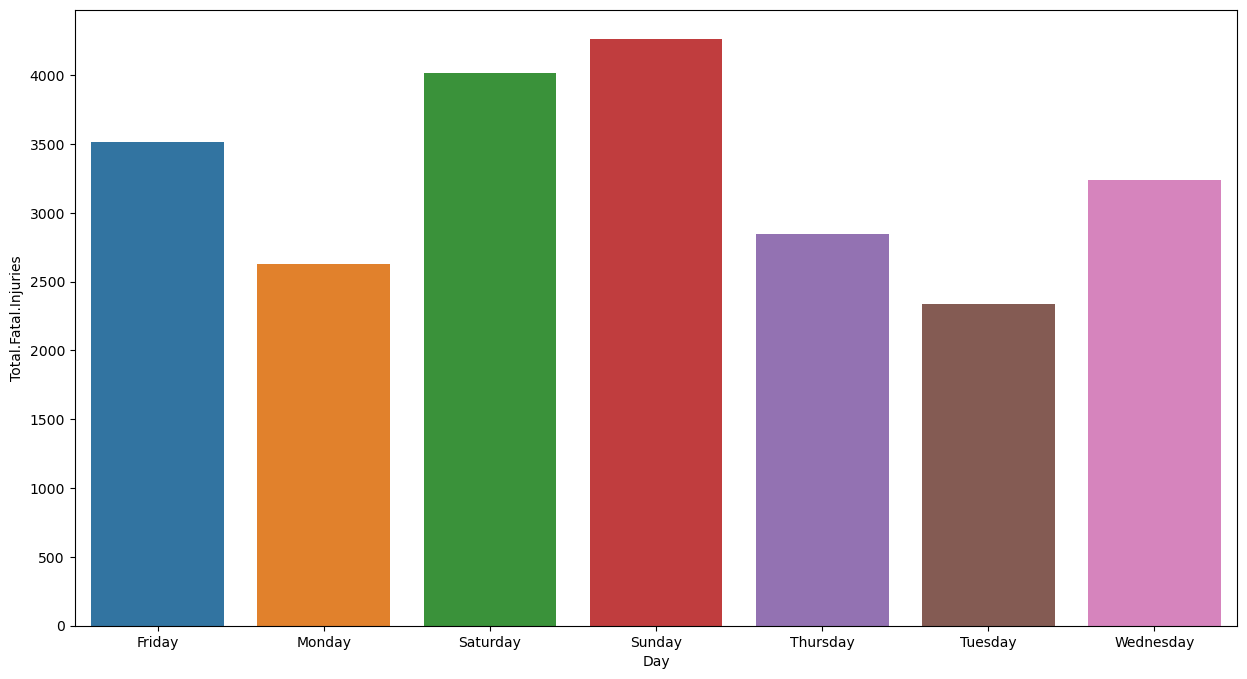

In [147]:
plt.figure(figsize = (15,8))
day_grouped_plot = sns.barplot(data = day_grouped, x = day_grouped['Day'], y= day_grouped['Total.Fatal.Injuries'])
plt.show()

In [185]:
new_df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Year
count,48601.000000,48601.000000,48601.000000
mean,1.133783,0.469887,1990.583959
std,0.408504,2.541921,6.169708
min,0.000000,0.000000,1948.000000
25%,1.000000,0.000000,1985.000000
50%,1.000000,0.000000,1990.000000
75%,1.000000,0.000000,1995.000000
max,4.000000,230.000000,2007.000000


In [149]:
year_grouped= new_df.groupby("Year").sum('Total.Fatal.Injuries').reset_index()
year_grouped

,Year,Number.of.Engines,Total.Fatal.Injuries
0,1948,1.0,2.0
1,1962,1.0,4.0
2,1974,1.0,3.0
3,1977,1.0,2.0
4,1981,1.0,4.0
5,1982,3910.0,1531.0
6,1983,3863.0,1230.0
7,1984,3790.0,1174.0
8,1985,3412.0,1335.0
9,1986,3071.0,1147.0


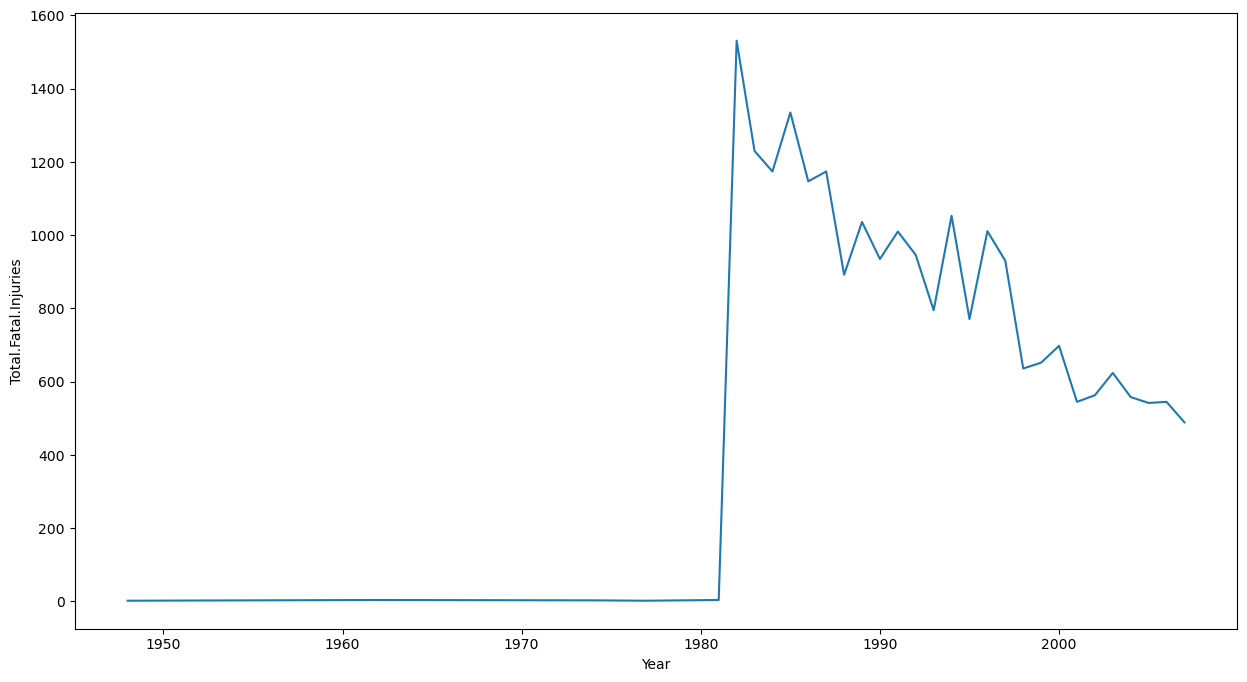

In [151]:
plt.figure(figsize = (15,8))
year_grouped_plot = sns.lineplot(data = year_grouped, x = year_grouped['Year'], y= year_grouped['Total.Fatal.Injuries'])
plt.show()

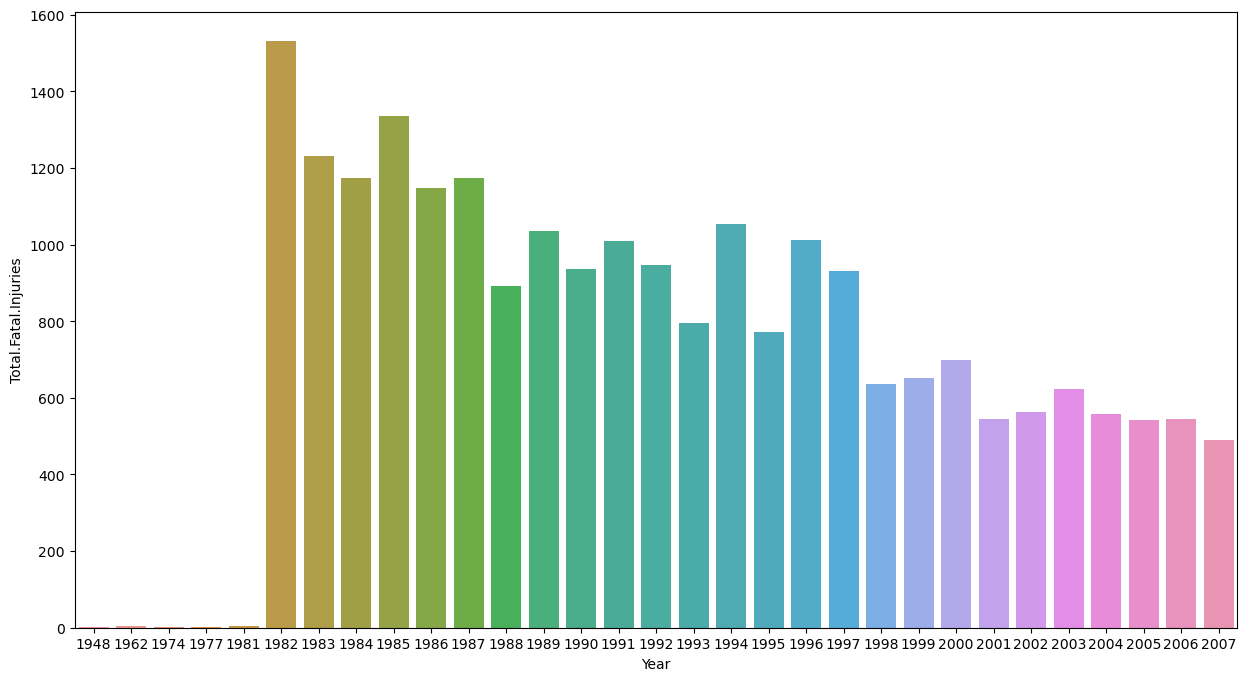

In [153]:
plt.figure(figsize = (15,8))
year_grouped_plot = sns.barplot(data = year_grouped, x = year_grouped['Year'], y= year_grouped['Total.Fatal.Injuries'])
plt.show()

In [189]:
new_df['Year'] = pd.to_datetime(new_df['Year'], format='%Y')


C:\Users\agnie\AppData\Local\Temp\ipykernel_39628\785279747.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Year'] = pd.to_datetime(new_df['Year'], format='%Y')


In [192]:
new_df

,Event.Id,Investigation.Type,Event.Date,Location,Aircraft.damage,Make,Model,Number.of.Engines,Purpose.of.flight,Total.Fatal.Injuries,Weather.Condition,Broad.phase.of.flight,City,State,Year,Month,Day
0,20001218X45444,Accident,1948-10-24,"MOOSE CREEK, ID",Destroyed,Stinson,108-3,1.0,Personal,2.0,Unknown,Cruise,MOOSE CREEK,ID,1948-01-01,October,Sunday
1,20001218X45447,Accident,1962-07-19,"BRIDGEPORT, CA",Destroyed,Piper,PA24-180,1.0,Personal,4.0,Unknown,Unknown,BRIDGEPORT,CA,1962-01-01,July,Thursday
2,20061025X01555,Accident,1974-08-30,"Saltville, VA",Destroyed,Cessna,172M,1.0,Personal,3.0,IMC,Cruise,Saltville,VA,1974-01-01,August,Friday
3,20001218X45448,Accident,1977-06-19,"EUREKA, CA",Destroyed,Rockwell,112,1.0,Personal,2.0,IMC,Cruise,EUREKA,CA,1977-01-01,June,Sunday
6,20001218X45446,Accident,1981-08-01,"COTTON, MN",Destroyed,Cessna,180,1.0,Personal,4.0,IMC,Unknown,COTTON,MN,1981-01-01,August,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63899,20080108X00030,Accident,2007-12-27,"Traverse City, MI",Destroyed,Cessna,310R,2.0,Personal,1.0,IMC,Approach,Traverse City,MI,2007-01-01,December,Thursday
63900,20080102X00006,Accident,2007-12-28,"MURRIETA, CA",Substantial,Hein,Sonex,1.0,Personal,0.0,VMC,Cruise,MURRIETA,CA,2007-01-01,December,Friday
63906,20080103X00010,Accident,2007-12-29,"Crowley, TX",Destroyed,Althouse,RAF 2000 GTX,1.0,Personal,2.0,VMC,Maneuvering,Crowley,TX,2007-01-01,December,Saturday
63908,20080109X00032,Accident,2007-12-30,"CHEROKEE, AL",Substantial,Bell,206L-3,1.0,Other Work Use,3.0,VMC,Maneuvering,CHEROKEE,AL,2007-01-01,December,Sunday


In [194]:
final_df = new_df.loc[(new_df['Year'] > '1981-01-01')]

In [195]:
final_df

,Event.Id,Investigation.Type,Event.Date,Location,Aircraft.damage,Make,Model,Number.of.Engines,Purpose.of.flight,Total.Fatal.Injuries,Weather.Condition,Broad.phase.of.flight,City,State,Year,Month,Day
7,20020909X01562,Accident,1982-01-01,"PULLMAN, WA",Substantial,Cessna,140,1.0,Personal,0.0,VMC,Takeoff,PULLMAN,WA,1982-01-01,January,Friday
8,20020909X01561,Accident,1982-01-01,"EAST HANOVER, NJ",Substantial,Cessna,401B,2.0,Business,0.0,IMC,Landing,EAST HANOVER,NJ,1982-01-01,January,Friday
9,20020909X01560,Accident,1982-01-01,"JACKSONVILLE, FL",Substantial,North American,NAVION L-17B,1.0,Personal,0.0,IMC,Cruise,JACKSONVILLE,FL,1982-01-01,January,Friday
10,20020909X01559,Accident,1982-01-01,"HOBBS, NM",Substantial,Piper,PA-28-161,1.0,Personal,0.0,VMC,Approach,HOBBS,NM,1982-01-01,January,Friday
11,20020909X01558,Accident,1982-01-01,"TUSKEGEE, AL",Substantial,Beech,V35B,1.0,Personal,0.0,VMC,Landing,TUSKEGEE,AL,1982-01-01,January,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63899,20080108X00030,Accident,2007-12-27,"Traverse City, MI",Destroyed,Cessna,310R,2.0,Personal,1.0,IMC,Approach,Traverse City,MI,2007-01-01,December,Thursday
63900,20080102X00006,Accident,2007-12-28,"MURRIETA, CA",Substantial,Hein,Sonex,1.0,Personal,0.0,VMC,Cruise,MURRIETA,CA,2007-01-01,December,Friday
63906,20080103X00010,Accident,2007-12-29,"Crowley, TX",Destroyed,Althouse,RAF 2000 GTX,1.0,Personal,2.0,VMC,Maneuvering,Crowley,TX,2007-01-01,December,Saturday
63908,20080109X00032,Accident,2007-12-30,"CHEROKEE, AL",Substantial,Bell,206L-3,1.0,Other Work Use,3.0,VMC,Maneuvering,CHEROKEE,AL,2007-01-01,December,Sunday


In [196]:
final_df.describe()

,Number.of.Engines,Total.Fatal.Injuries
count,48596.000000,48596.000000
mean,1.133797,0.469627
std,0.408523,2.541906
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,0.000000
75%,1.000000,0.000000
max,4.000000,230.000000


In [198]:
final_df.to_csv('final_df.csv')

In [199]:
year_grouped_final= final_df.groupby("Year").sum('Total.Fatal.Injuries').reset_index()
year_grouped_final

,Year,Number.of.Engines,Total.Fatal.Injuries
0,1982-01-01,3910.0,1531.0
1,1983-01-01,3863.0,1230.0
2,1984-01-01,3790.0,1174.0
3,1985-01-01,3412.0,1335.0
4,1986-01-01,3071.0,1147.0
5,1987-01-01,3049.0,1174.0
6,1988-01-01,2842.0,892.0
7,1989-01-01,2687.0,1036.0
8,1990-01-01,2641.0,935.0
9,1991-01-01,2564.0,1010.0


In [200]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48596 entries, 7 to 63909
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Event.Id               48596 non-null  object        
 1   Investigation.Type     48596 non-null  object        
 2   Event.Date             48596 non-null  datetime64[ns]
 3   Location               48596 non-null  object        
 4   Aircraft.damage        48596 non-null  object        
 5   Make                   48596 non-null  object        
 6   Model                  48596 non-null  object        
 7   Number.of.Engines      48596 non-null  float64       
 8   Purpose.of.flight      48596 non-null  object        
 9   Total.Fatal.Injuries   48596 non-null  float64       
 10  Weather.Condition      48596 non-null  object        
 11  Broad.phase.of.flight  48596 non-null  object        
 12  City                   48596 non-null  object        
 13  S